* Reference: __Algorithmic Trading: Winning Strategies and Their Rationale__ _by_ Ernest P. Chan

# Mean Reversion

This description of the mean-reverting processes closely follows the work of _Ernest P. Chan_ __Algorithmic Trading: Winning Strategies and Their Rationale__  [available here](https://www.wiley.com/en-us/Algorithmic+Trading%3A+Winning+Strategies+and+Their+Rationale-p-9781118460146). 

Additional information on the Engle-Granger cointegration test can be found in a paper by _Faik Bilgili_ __Stationarity and cointegration tests: Comparison of Engle-Granger and Johansen methodologies__ [available here](https://mpra.ub.uni-muenchen.de/75967/1/MPRA_paper_75967.pdf).

## Introduction

Mean-reverting processes and events often occur in nature. Observations of the processes that have a mean-reverting nature tend to move to their average value over time. However, as mentioned in the work of E.P. Chan, most financial price series are not mean-reverting.

The upside is that we can construct advanced financial instruments from multiple simple ones thus obtaining the desired property. Observation series (stock, commodity prices, etc.) that can be combined to achieve a mean-reverting process are called *cointegrating*. The approach described above allows us to use the properties of mean-reverting processes to generate profit.

## Augmented Dickey–Fuller (ADF) test

According to Ernest P. Chan:
"The mathematical description of a mean-reverting price series is that the change of the price series in the next period is proportional to the difference between the mean price and the current price. This gives rise to the ADF test, which tests whether we can reject the null hypothesis that the proportionality
constant is zero."

The ADF test is based on the idea that the current price level gives us information about the future price level: if it's lower than the mean, the next move will be upwards, and vice versa.

The ADF test uses the linear model that describes the price changes as follows:

$$\Delta y(t) = \lambda y(t-1) + \mu + \beta t + \alpha_1 \Delta y(t-1) + ... \alpha_k \Delta y(t-k) + \epsilon_t$$

where $\Delta y(t) \equiv y(t) - y(t-1)$, $\Delta y(t) \equiv y(t-1) - y(t-2)$, ...

The hypothesis that is being tested is: $\lambda = 0$. For simplicity we assume the drift term to be zero ($\beta = 0$). If we reject the hypothesis, this means that the next price move depends on the current price level.


## The Half-life period

Mean reversion tests, such as ADF usually require at least 90 percent certainty. But in practice, we can create strategies that are profitable even at lower certainty levels. The measure $\lambda$ can be used to calculate the *half-life*, which indicates how long it takes for a price to mean revert:

$$Half-life = -log(2) / \lambda$$

Furthermore, we can see that if the $\lambda$ value is positive, the price series are not mean-reverting. If it's close to zero, the half-life is very long and the strategy won't be profitable due to slow mean reversion.

Half-life period can be helpful to determine some of the parameters to use in the trading strategy. Say, if the half-life period is 20 days, then using 5 days backward-looking window for moving average or volatility calculation may not give the best results.

The most common approach is to use two cointegrated price series to construct a portfolio. This is done by simultaneously going long on one asset and short on the other, with an appropriate capital allocation for each asset. This approach is also called a "pairs trading strategy". However, the approach can be extended to three and more assets.

## Johansen cointegration test

This is one of the most widely used cointegration tests, it's upside is that, first it allows multiple price series for stationarity testing, and second it provides hedge ratios for price series used to combine elements into a stationary portfolio.

To understand how to test the cointegration of more than two variables, we can transform the equation used in the ADF test to a vector form. So $y(t)$ would be vectors representing multiple price series, and the $\lambda$ and $\alpha$ are matrices. We also assume that the drift term is zero ($\beta t = 0$). So the equation can be rewritten as follows:

$$\Delta Y(t) = \Lambda Y(t-1) + M + A_1 \Delta Y(t-1) + ... + A_k \Delta Y(t-k) + \epsilon_t$$

This way we can test the hypothesis of $\Lambda = 0$, in which case, we don't have cointegration present. Denoting the rank of the obtained matrix $\Lambda$ as $r$ and the number of price series as $n$, the number of independent portfolios that can be formed is equal to $r$.

The Johansen test calculates the $r$ and tests the hypotheses of $r = 0$ (cointegrating relationship exists), $r \le 1$, ..., $r \le n - 1$. In case all the above hypotheses are rejected, the result is that $r = n$ and the eigenvectors of the $\Lambda$ can be used as hedge ratios to construct a mean-reverting portfolio.

Note that the Johansen test is independent of the order of the price series, in contrast to the CADF test.

## Engle-Granger cointegration test


The cointegration testing approach proposed by Engle-Granger allows us to test whether two or more price series are cointegrated of a given order.

The Engle-Granger cointegration test is performed as follows:

- First, we need to determine the order of integration of variables $x$ and $y$
  (or $y_{1}, y_{2}, ...$ in case of more than two variables). If they are integrated of the same order, we can apply the cointegration test.
- Next, if the variables are integrated of order one at the previous step, the following regressions can be performed:

$$x_t = a_0 + a_1 y_t + e_{1,t},$$

$$y_t = b_0 + b_1 x_t + e_{2,t}$$

- Finally we run the following regressions and test for unit root for each equation:

$$\Delta e_{1,t} = a_1 e_{1, t-1} + v_{1, t},$$

$$\Delta e_{2,t} = a_2 e_{2, t-1} + v_{2, t}$$

If we cannot reject the null hypotheses that $|a_1| = 0$ and $|a_2| = 0$, we cannot reject the hypothesis that the variables are not cointegrated.

The hedge ratios for constructing a mean-reverting portfolio in the case of the Engle-Granger test are set to $1$ for the $x$ variable and the coefficient $-a_1$ for the $y$ variable (or $-a_1, -a_2, ..$ in case of multiple $y_i$ price series).

The Engle-Granger cointegration test implemented in the ArbitrageLab package assumes that the first step of the algorithm is passed and that the variables are integrated of order one.

## Bollinger Bands trading strategy

By using the Bollinger bands on the Z-scores from the provided spread, we can construct a trading strategy.
The Z-score is calculated as a normalized deviation of the spread value from its moving average.
The formula can be written as follows:

$$Zscore_{t} = \frac{S_{t} - MA(S_{t}, T_{MA})}{std(S_{t}, T_{std})}$$

Where:

- $S_{t}$ is the spread value at time $t$.

- $MA(S_{t}, T_{MA})$ is the moving average of the spread calculated
  using a backward-looking $T_{MA}$ window.

- $std(S_{t}, T_{std})$ is the rolling standard deviation of the spread
  calculated using a backward-looking $T_{std}$ window.

The idea is to enter a position only when the price deviates by more than *entryZscore* standard deviations
from the mean. This parameter can be optimized in a training set.

Also, the look-back windows for calculating the mean and the standard deviation are the parameters that
can be optimized. We can later exit the strategy when the price reverts to the *exitZscore* standard
deviations from the mean (*exitZscore* $<$ *entryZscore*).

If *exitZscore* $= -$ *entryZscore*, we will exit when the price moves beyond the opposite band,
also triggering a trading signal of the opposite sign. At either time we can have either zero or one
unit (long or short) invested, so capital allocation is easy.

If the look-back window is short and we set a small *entryZscore* and *exitZscore*, the holding period
will be shorter and we get more round trip trades and generally higher profits.

The strategy object is initialized with a window for a simple moving average, a window for
simple moving st. deviation, and entry and exit label Z-Scores.

The `update_spread_value` method allows adding new spread values one by one - when they are available.
At each stage, the `check_entry_signal` method checks if the trade should be entered according to the
above-described logic. If the trade should be opened, it can be added to the internal dictionary using the
`add_trade` method.

As well, the `update_trades` method can be used to check if any trades should be closed.
If so, the internal dictionaries are updated, and the list of the closed trades at this stage is returned.

## Usage of the Algorithms

Let's use the above tools on real data. 

First, we will use the cointegration tests on datasets to determine if it's possible to construct a mean-reverting portfolio. Then we will create such a portfolio, find its half-lif, and run trading strategies on it. Finally, we will analyze the obtained results. 

In [1]:
import arbitragelab as al
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Loading data

Following the example in the Optimal Mean Reversion module, we will use Gold Shares ETF (GLD), Gold Miners ETF (GDX), and Junior Gold Miners ETF (GDXJ) to construct a portfolio of three elements.

In [2]:
# Loading data
train_data =  yf.download("GLD GDX GDXJ", start="2016-01-01", end="2018-01-01")
test_data =  yf.download("GLD GDX GDXJ", start="2018-01-02", end="2020-01-01")

# Taking close prices for chosen instruments
train_three_elements = train_data["Adj Close"][["GLD", "GDX", "GDXJ"]]

test_three_elements = test_data["Adj Close"][["GLD", "GDX", "GDXJ"]]

# Looking at the downloaded data
train_three_elements.head()

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed


,GLD,GDX,GDXJ
Date,,,
2015-12-31,101.459999,13.105696,17.456858
2016-01-04,102.889999,13.459128,17.993013
2016-01-05,103.180000,13.392262,18.029364
2016-01-06,104.669998,13.611964,18.338333
2016-01-07,106.150002,14.213758,18.765438


### Johansen test

Now let's run the cointegration tests and analyze the results.

In [3]:
# Initialising an object containing needed methods
j_portfolio = al.cointegration_approach.JohansenPortfolio()

# Fitting the data on a dataset of three elements with constant term
j_portfolio.fit(train_three_elements, det_order=0)

# Getting results of the eigenvalue and trace Johansen tests
j_eigenvalue_statistics = j_portfolio.johansen_eigen_statistic
j_trace_statistics = j_portfolio.johansen_trace_statistic
j_cointegration_vectors = j_portfolio.cointegration_vectors
j_hedge_ratios = j_portfolio.hedge_ratios

In [4]:
# First, the eigenvalue statistic test
j_eigenvalue_statistics

,GLD,GDX,GDXJ
90%,18.892800,12.29710,2.705500
95%,21.131400,14.26390,3.841500
99%,25.865000,18.52000,6.634900
eigen_value,23.136798,12.89696,4.058005


Using the eigenvalue statistic test, we can see that our eigenvalue statistics are above the 95% significance level values for two elements - GLD and GDXJ. And they are all above the 90% significance level values.

So at a 90% significance level, three elements are cointegrated, we can construct three possible mean-reverting portfolios using the coefficients from the 
*j_cointegration_vectors* variable.

In [5]:
# Next, the alternative trace statistic test
j_trace_statistics

,GLD,GDX,GDXJ
90%,27.066900,13.429400,2.705500
95%,29.796100,15.494300,3.841500
99%,35.462800,19.934900,6.634900
trace_statistic,40.091763,16.954965,4.058005


In [6]:
# Cointegration vectors
j_cointegration_vectors

,GLD,GDX,GDXJ
0,0.406693,-1.804367,0.671575
1,-0.000708,0.541323,-0.124205
2,-0.209996,-0.203786,0.302985


We have slightly different results for the trace statistic test. Here, all three trace statistics are above the 95% significance level values.

According to this test, at a 95% significance level, three elements are cointegrated, we can construct three possible mean-reverting portfolios using the hedge ratios  from the same *j_hedge_ratios* variable.

In [7]:
# Hedge ratios to construct a mean-reverting spread 
j_hedge_ratios

,GLD,GDX,GDXJ
0,1.0,4.436676,-1.651306
1,1.0,764.320532,-175.371526
2,1.0,-0.970427,1.442812


### Engle-Granger test

In [8]:
# Initialising an object containing needed methods
eg_portfolio = al.cointegration_approach.EngleGrangerPortfolio()

# Fitting the data on a dataset of three elements with constant term
eg_portfolio.fit(train_three_elements, add_constant=True)

# Getting results of the Engle-Granger test
eg_adf_statistics = eg_portfolio.adf_statistics
eg_cointegration_vectors = eg_portfolio.cointegration_vectors
eg_hedge_ratios = eg_portfolio.hedge_ratios

In [9]:
# Looking at the statistic from the last step of the Engle-Granger test
eg_adf_statistics

,0
99%,-3.443418
95%,-2.867303
90%,-2.569840
statistic_value,-3.260982


In [10]:
# Cointegration vectors
eg_cointegration_vectors

,GLD,GDX,GDXJ
0,1.0,-3.275548,0.984685


Using the ADF statistic test output, we can see that our statistic is above the 95% significance level value.

So at a 95% significance level, our elements are cointegrated, we can construct a mean-reverting portfolio using the coefficients from the *eg_hedge_ratios* variable.

In [11]:
eg_hedge_ratios

,GLD,GDX,GDXJ
0,1.0,3.275548,-0.984685


As described in the theoretical part, the coefficient for the first element is $1$, while other two are equal to negative regression coefficients.

### Constructing spread series

For constructing spread series it's advised to use the functionality of the Hedge Ratios module.

In [12]:
from arbitragelab.hedge_ratios import (get_ols_hedge_ratio, get_tls_hedge_ratio,
                                       get_johansen_hedge_ratio, get_box_tiao_hedge_ratio,
                                       get_minimum_hl_hedge_ratio, get_adf_optimal_hedge_ratio,
                                       construct_spread)

In [13]:
# Calculating hedge ratios using the supported algorithms
ols_hedge_ratio, _, _, _ = get_ols_hedge_ratio(train_three_elements, dependent_variable='GLD',
                                               add_constant=False)
print(f'OLS hedge ratio for SPY/QQQ spread is {ols_hedge_ratio}')

tls_hedge_ratio, _, _, _ = get_tls_hedge_ratio(train_three_elements, dependent_variable='GLD')
print(f'TLS hedge ratio for SPY/QQQ spread is {tls_hedge_ratio}')

joh_hedge_ratio, _, _, _ = get_johansen_hedge_ratio(train_three_elements, dependent_variable='GLD')
print(f'Johansen hedge ratio for SPY/QQQ spread is {joh_hedge_ratio}')

box_tiao_hedge_ratio, _, _, _ = get_box_tiao_hedge_ratio(train_three_elements, dependent_variable='GLD')
print(f'Box-Tiao hedge ratio for SPY/QQQ spread is {box_tiao_hedge_ratio}')

hl_hedge_ratio, _, _, _, opt_object = get_minimum_hl_hedge_ratio(train_three_elements,
                                                                 dependent_variable='GLD')
print(f'Minimum HL hedge ratio for SPY/QQQ spread is {hl_hedge_ratio}')

adf_hedge_ratio, _, _, _, opt_object = get_adf_optimal_hedge_ratio(train_three_elements,
                                                                   dependent_variable='GLD')
print(f'Minimum ADF t-statistic hedge ratio for SPY/QQQ spread is {adf_hedge_ratio}')


OLS hedge ratio for SPY/QQQ spread is {'GLD': 1.0, 'GDX': 11.518785796811615, 'GDXJ': -4.131862128768251}
TLS hedge ratio for SPY/QQQ spread is {'GLD': 1.0, 'GDX': 16.20262634294468, 'GDXJ': -7.257102810773029}
Johansen hedge ratio for SPY/QQQ spread is {'GLD': 1.0, 'GDX': 4.43667627657224, 'GDXJ': -1.6513064429701843}
Box-Tiao hedge ratio for SPY/QQQ spread is {'GLD': 1.0, 'GDX': 3.938312783289991, 'GDXJ': -1.3759067838435803}


/Users/illya/Programs/Anaconda/anaconda3/envs/arblab3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Minimum HL hedge ratio for SPY/QQQ spread is {'GLD': 1.0, 'GDX': 3.946674787647176, 'GDXJ': -1.3834025628239492}
Minimum ADF t-statistic hedge ratio for SPY/QQQ spread is {'GLD': 1.0, 'GDX': 19960.596147759185, 'GDXJ': 2177.826238226206}


Let's use the Johansen hedge ratio to construct a spread.

In [14]:
# Constructing spread
j_spread = construct_spread(test_three_elements, hedge_ratios=joh_hedge_ratio)

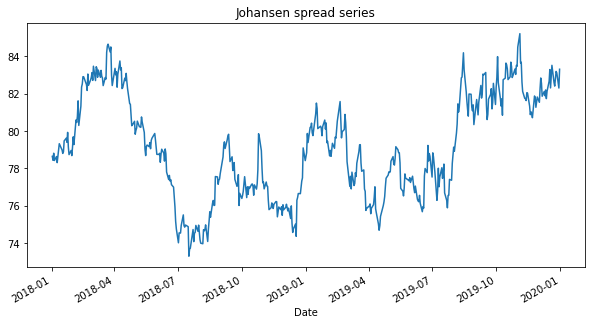

In [15]:
# Plotting Johansen spread series
j_spread.plot(title='Johansen spread series', figsize=(10,5));

Spreads using other hedge ratios can be constructed in the same way.

### Calculating the half-life of obtained portfolios 

In [16]:
# Importing the needed function
from arbitragelab.cointegration_approach import get_half_life_of_mean_reversion

In [17]:
j_half_life = get_half_life_of_mean_reversion(j_spread)

print('Half-life of the Johansen spread is', j_half_life, 'days.')

Half-life of the Johansen spread is 31.600717538235756 days.


The half-life of the Johansen spread is relatively short.

The half-life calculation can be used to determine which spread poses more interest for trading as it is reverting to its mean value faster, allowing for more potential trades to be opened over the same time period.

### Applying Bollinger Bands trading strategy

This trading strategy requires defining entry and exit Z-scores. Let's choose the entry Z-score - upon which the strategy will enter a short position, going short one unit of a portfolio. This position will be closed once the exit Z-score delta will be traveled in the opposite direction.

In our example, we will be using an entry Z-score of 2.5 and an exit Z-score delta of 3.

In [18]:
# Importing the needed function
from arbitragelab.spread_trading import BollingerBandsTradingRule

In [19]:
# Creating a strategy
strategy = BollingerBandsTradingRule(sma_window=20, std_window=20,
                                     entry_z_score=2.5, exit_z_score_delta=3)

Now we feed Johansen spread values one by one to the strategy object.

With a live data feed the spread value would be provided to the strategy object in the same way.

In [20]:
# Adding initial spread value
strategy.update_spread_value(j_spread[0])

# Feeding spread values to the strategy one by one
for time, value in j_spread.iteritems():
    strategy.update_spread_value(value)

    # Checking if logic for opening a trade is triggered
    trade, side = strategy.check_entry_signal()

    # Adding a trade if we decide to trade signal
    if trade:
        strategy.add_trade(start_timestamp=time, side_prediction=side)

    # Update trades, close if logic is triggered
    close = strategy.update_trades(update_timestamp=time, update_value=value)

/Users/illya/Projects/arbitragelab/arbitragelab/spread_trading/z_score.py:68: RuntimeWarning: invalid value encountered in double_scalars
  return (spread_slice[-1] - mean_spread) / std_spread


Now we can see which positions were opened and closed during this time period.

In [21]:
# Currently open trades in a strategy
open_trades = strategy.open_trades

open_trades

{}

So all open trades were closed.

In [22]:
# Checking all closed trades
closed_trades = strategy.closed_trades

closed_trades

{Timestamp('2018-02-05 00:00:00'): {'t1': Timestamp('2018-03-16 00:00:00'),
  'pt': -1.3135211086561323,
  'uuid': None,
  'start_value': 80.59748978682802,
  'end_value': 82.43824880808627,
  'side': -1,
  'initial_z_score': 2.7150795029889943},
 Timestamp('2018-02-08 00:00:00'): {'t1': Timestamp('2018-03-16 00:00:00'),
  'pt': -1.3135211086561323,
  'uuid': None,
  'start_value': 81.6206497341476,
  'end_value': 82.43824880808627,
  'side': -1,
  'initial_z_score': 2.658908464310359},
 Timestamp('2018-03-21 00:00:00'): {'t1': Timestamp('2018-03-28 00:00:00'),
  'pt': -0.4922814721191836,
  'uuid': None,
  'start_value': 84.21488779679026,
  'end_value': 83.00964037271294,
  'side': -1,
  'initial_z_score': 2.93095790377039},
 Timestamp('2018-03-22 00:00:00'): {'t1': Timestamp('2018-03-28 00:00:00'),
  'pt': -0.4922814721191836,
  'uuid': None,
  'start_value': 84.5617352631004,
  'end_value': 83.00964037271294,
  'side': -1,
  'initial_z_score': 2.745529073991901},
 Timestamp('2018-0

A total of 12 trades were open during this period.

### Strategy outputs

We can see the following data:
* Dictionary key:
    * Timestamp at which the trade was opened
* Dctionary value:
    * t1: Timestamp at which the trade was closed
    * pt: Z-score at which the trade was closed
    * uuid: Trade ID that can be provided for each trade
    * start_value: Spread value at which spread was opened
    * end_value: Spread value at which spread was closed
    * side: Side of the trade '-1' for short and '1' for long
    * initial_z_score: Z-score at which the trade was opened

We can see that each of the closed trades during this period was profitable - the spread value change was in the right direction, according to the trade side.

This strategy can be furhter adjusted by choosing different entry and exit Z-score deltas, by optimizing them in a training set first.

## Conclusion

This notebook describes the Mean Reversion module tools - cointegration tests and trading strategies. Also, it shows how these tools can be used on real data and that they can output profitable trading signals.

The algorithms and the descriptions used in this notebook were described by _Ernest P. Chan_ in the book __Algorithmic Trading: Winning Strategies and Their Rationale__  [available here](https://www.wiley.com/en-us/Algorithmic+Trading%3A+Winning+Strategies+and+Their+Rationale-p-9781118460146).

Key takeaways from the notebook:

- Mean-reverting processes tend to move to their average value over time. However, most financial price series are not mean-reverting.
- Financial instruments can be combined in a portfolio that has mean-reverting properties.
- ADF test allows testing if the next price move depends on the current price level.
- Half-life of a mean-reverting process indicates how long it takes for a price to mean revert.
- Both Johansen and Engle-Granger cointegration tests allow testing if we can construct a mean-reverting portfolio out of multiple price series, and if so, which combination of these elements should we use to construct a portfolio.
- Constructed portfolios can be used in the Linear and Bollinger Bands trading strategies.
- The Bollinger Bands  strategy  deals with the issues present in the linear strategy: infinitesimal portfolio rebalances and no predefined buying power.